# `numpy` integration

The `numpy` library is a defactor interface now - how compatible (or not) is it with `DataFrame`'s?

The prototype here contains just enough to understand what is possible - it is far from something that fills out all the implementation!

In [5]:
import sys
sys.path = ['..'] + sys.path
from hep_tables import xaod_table,make_local
from func_adl import EventDataset
import matplotlib.pyplot as plt

import numpy as np

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

In [3]:
dataset = EventDataset('localds://mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00')
df = xaod_table(dataset)

## `numpy` Math Functions

These include things like `np.sin` and `np.absolute` - here we do `np.abs` since it is one were the backend already works.

In [6]:
%%time
eles = df.Electrons("Electrons")
good_eles = eles[np.abs(eles.eta) < 2.5]
np_pts_good_short = make_local(good_eles.eta)

Wall time: 3min 16s


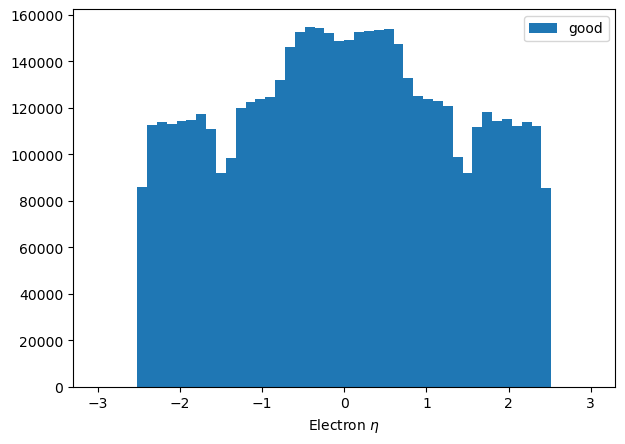

In [8]:
plt.hist(np_pts_good_short.flatten(), label='good', bins=50, range=(-3.0,3.0))
plt.xlabel("Electron $\eta$")
plt.legend();

## Histograms

Perhaps the basis for many plots we do in particle physics is the histogram. When it comes down to it, in Run 4+, it is not likely we can run this locally - we'll need to run it remotely. Unfortunately, `numpy` doesn't use the extension mechanism for `numpy.histogram` - so we have to re-write it. This is what it might look like:

In [9]:
from hep_tables import histogram

In [11]:
good_eles = eles[np.abs(eles.eta) < 2.5]
np_pts_good_short = make_local(histogram(good_eles.eta, bins=50, range=(-3.0,3.0)))

In [12]:
np_pts_good_short

(array([     0,      0,      0,      0,  85745, 112741, 113874, 112983,
        114508, 114784, 117134, 110956,  91870,  98522, 119778, 122264,
        123661, 124620, 132150, 146337, 152674, 154650, 154280, 151966,
        148552, 149257, 152511, 152984, 153445, 153742, 147485, 132846,
        125098, 123592, 123053, 120665,  98664,  91761, 111661, 118223,
        114385, 114995, 112068, 113957, 112241,  85682,      0,      0,
             0,      0], dtype=int64),
 array([-3.  , -2.88, -2.76, -2.64, -2.52, -2.4 , -2.28, -2.16, -2.04,
        -1.92, -1.8 , -1.68, -1.56, -1.44, -1.32, -1.2 , -1.08, -0.96,
        -0.84, -0.72, -0.6 , -0.48, -0.36, -0.24, -0.12,  0.  ,  0.12,
         0.24,  0.36,  0.48,  0.6 ,  0.72,  0.84,  0.96,  1.08,  1.2 ,
         1.32,  1.44,  1.56,  1.68,  1.8 ,  1.92,  2.04,  2.16,  2.28,
         2.4 ,  2.52,  2.64,  2.76,  2.88,  3.  ]))

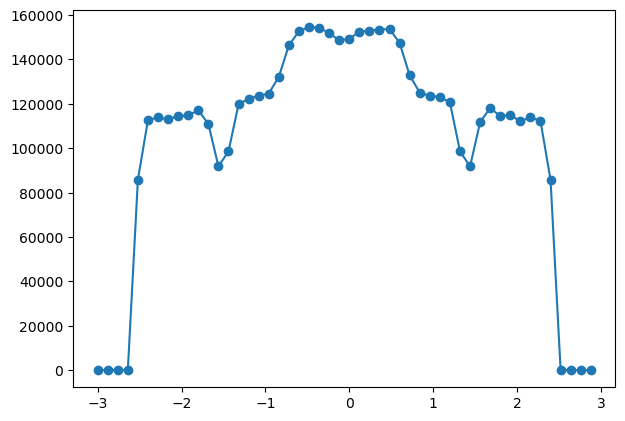

In [15]:
plt.plot(np_pts_good_short[1][:-1], np_pts_good_short[0], marker='o')

This is a bit of a cheat, btw. The backend evaluates the histogram locally by getting the data from `servicex` and then pushing it through `numpy.histogram`. However, all these instructions are in the DAQ before `make_local` is called - so could easily be shipped to a remote analysis facility.

And yes, my `matplotlib` usage could probably be better.